In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('bottle.csv')
df.describe()


,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,...,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
count,864863.000000,864863.000000,864863.000000,853900.000000,817509.000000,696201.000000,812174.000000,661274.000000,661268.000000,118667.000000,...,225276.000000,225275.000000,864863.000000,122006.000000,1999.000000,224.000000,2084.000000,234.000000,10.000000,84.000000
mean,17138.790958,432432.000000,226.831951,10.799677,33.840350,3.392468,25.819394,57.103779,148.808694,10.497426,...,0.450225,0.198599,228.395694,162.071521,2153.239714,2168.148330,2256.055845,2278.858803,7.948570,7.910983
std,10240.949817,249664.587269,316.050259,4.243825,0.461843,2.073256,1.167787,37.094137,90.187533,6.189688,...,1.208566,0.376539,319.456731,85.722796,112.995202,154.852332,34.844435,58.496495,0.021216,0.077666
min,1.000000,1.000000,0.000000,1.440000,28.431000,-0.010000,20.934000,-0.100000,-0.434900,0.000000,...,-0.010000,-3.890000,0.000000,0.000000,1948.850000,1969.440000,2181.570000,2198.150000,7.923100,7.618300
25%,8269.000000,216216.500000,46.000000,7.680000,33.488000,1.360000,24.965000,21.100000,60.915470,5.000000,...,0.050000,0.050000,46.000000,200.000000,2028.330000,2008.977500,2230.322500,2229.062500,7.931475,7.898675
50%,16848.000000,432432.000000,125.000000,10.060000,33.863000,3.440000,25.996000,54.400000,151.064150,10.000000,...,0.160000,0.110000,126.000000,206.000000,2170.640000,2265.885000,2244.325000,2247.505000,7.946650,7.928850
75%,26557.000000,648647.500000,300.000000,13.880000,34.196900,5.500000,26.646000,97.600000,240.379600,16.000000,...,0.390000,0.230000,302.000000,214.000000,2253.810000,2315.525000,2278.505000,2316.452500,7.963300,7.955100
max,34404.000000,864863.000000,5351.000000,31.140000,37.034000,11.130000,250.784000,214.100000,485.701800,25.000000,...,66.110000,65.300000,5458.000000,424.000000,2367.800000,2364.420000,2434.900000,2437.000000,7.988300,8.047700


In [77]:
# Data Cleaning
df = df[['Salnty', 'T_degC']] 
df.dropna(axis = 0,inplace = True)
df.shape # (814247, 2) too many data, we just take 500 rows
df = df[:][:500]
df.shape 

(500, 2)

Salnty   -0.921586
T_degC    1.000000
dtype: float64

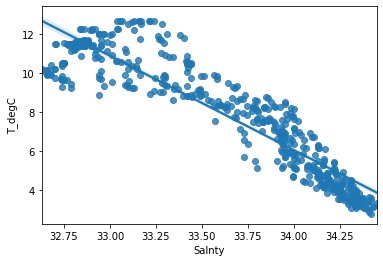

In [78]:
sns.regplot(x="Salnty", y="T_degC", data=df);
# From the Graph, we can see there's a correlation between Salnty and Temperature
df.corrwith(df['T_degC']) # -0.921586

In [79]:
from sklearn.model_selection import train_test_split

X = df['Salnty'].values.reshape(-1,1)
y = df['T_degC'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [32]:
from sklearn.linear_model import  LinearRegression

regessor = LinearRegression()
regessor.fit(X_train, y_train)

LinearRegression()

In [33]:
regessor.intercept_
regessor.coef_

array([-4.80887974])

In [35]:
y_pred = regessor.predict(X_test.reshape(-1,1))

In [64]:
result_df = pd.DataFrame({'Actual' : y_test, 'Predicted': y_pred})
result_df



<AxesSubplot:>

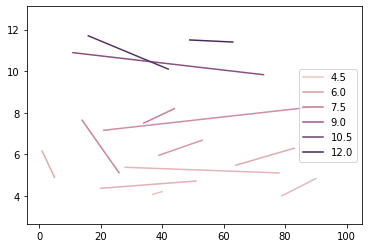

In [68]:


x = np.arange(1, 101, 1)
plt.plot(x,y_test)

In [37]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.7972361510681794
Mean Squared Error: 1.0061615080473425
Root Mean Squared Error: 1.003076023064724
